In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import random
import math
import seaborn as sns
df=pd.read_csv('house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
corr_rank = df.corr()
corr_rank["SalePrice"].sort_values(ascending=True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

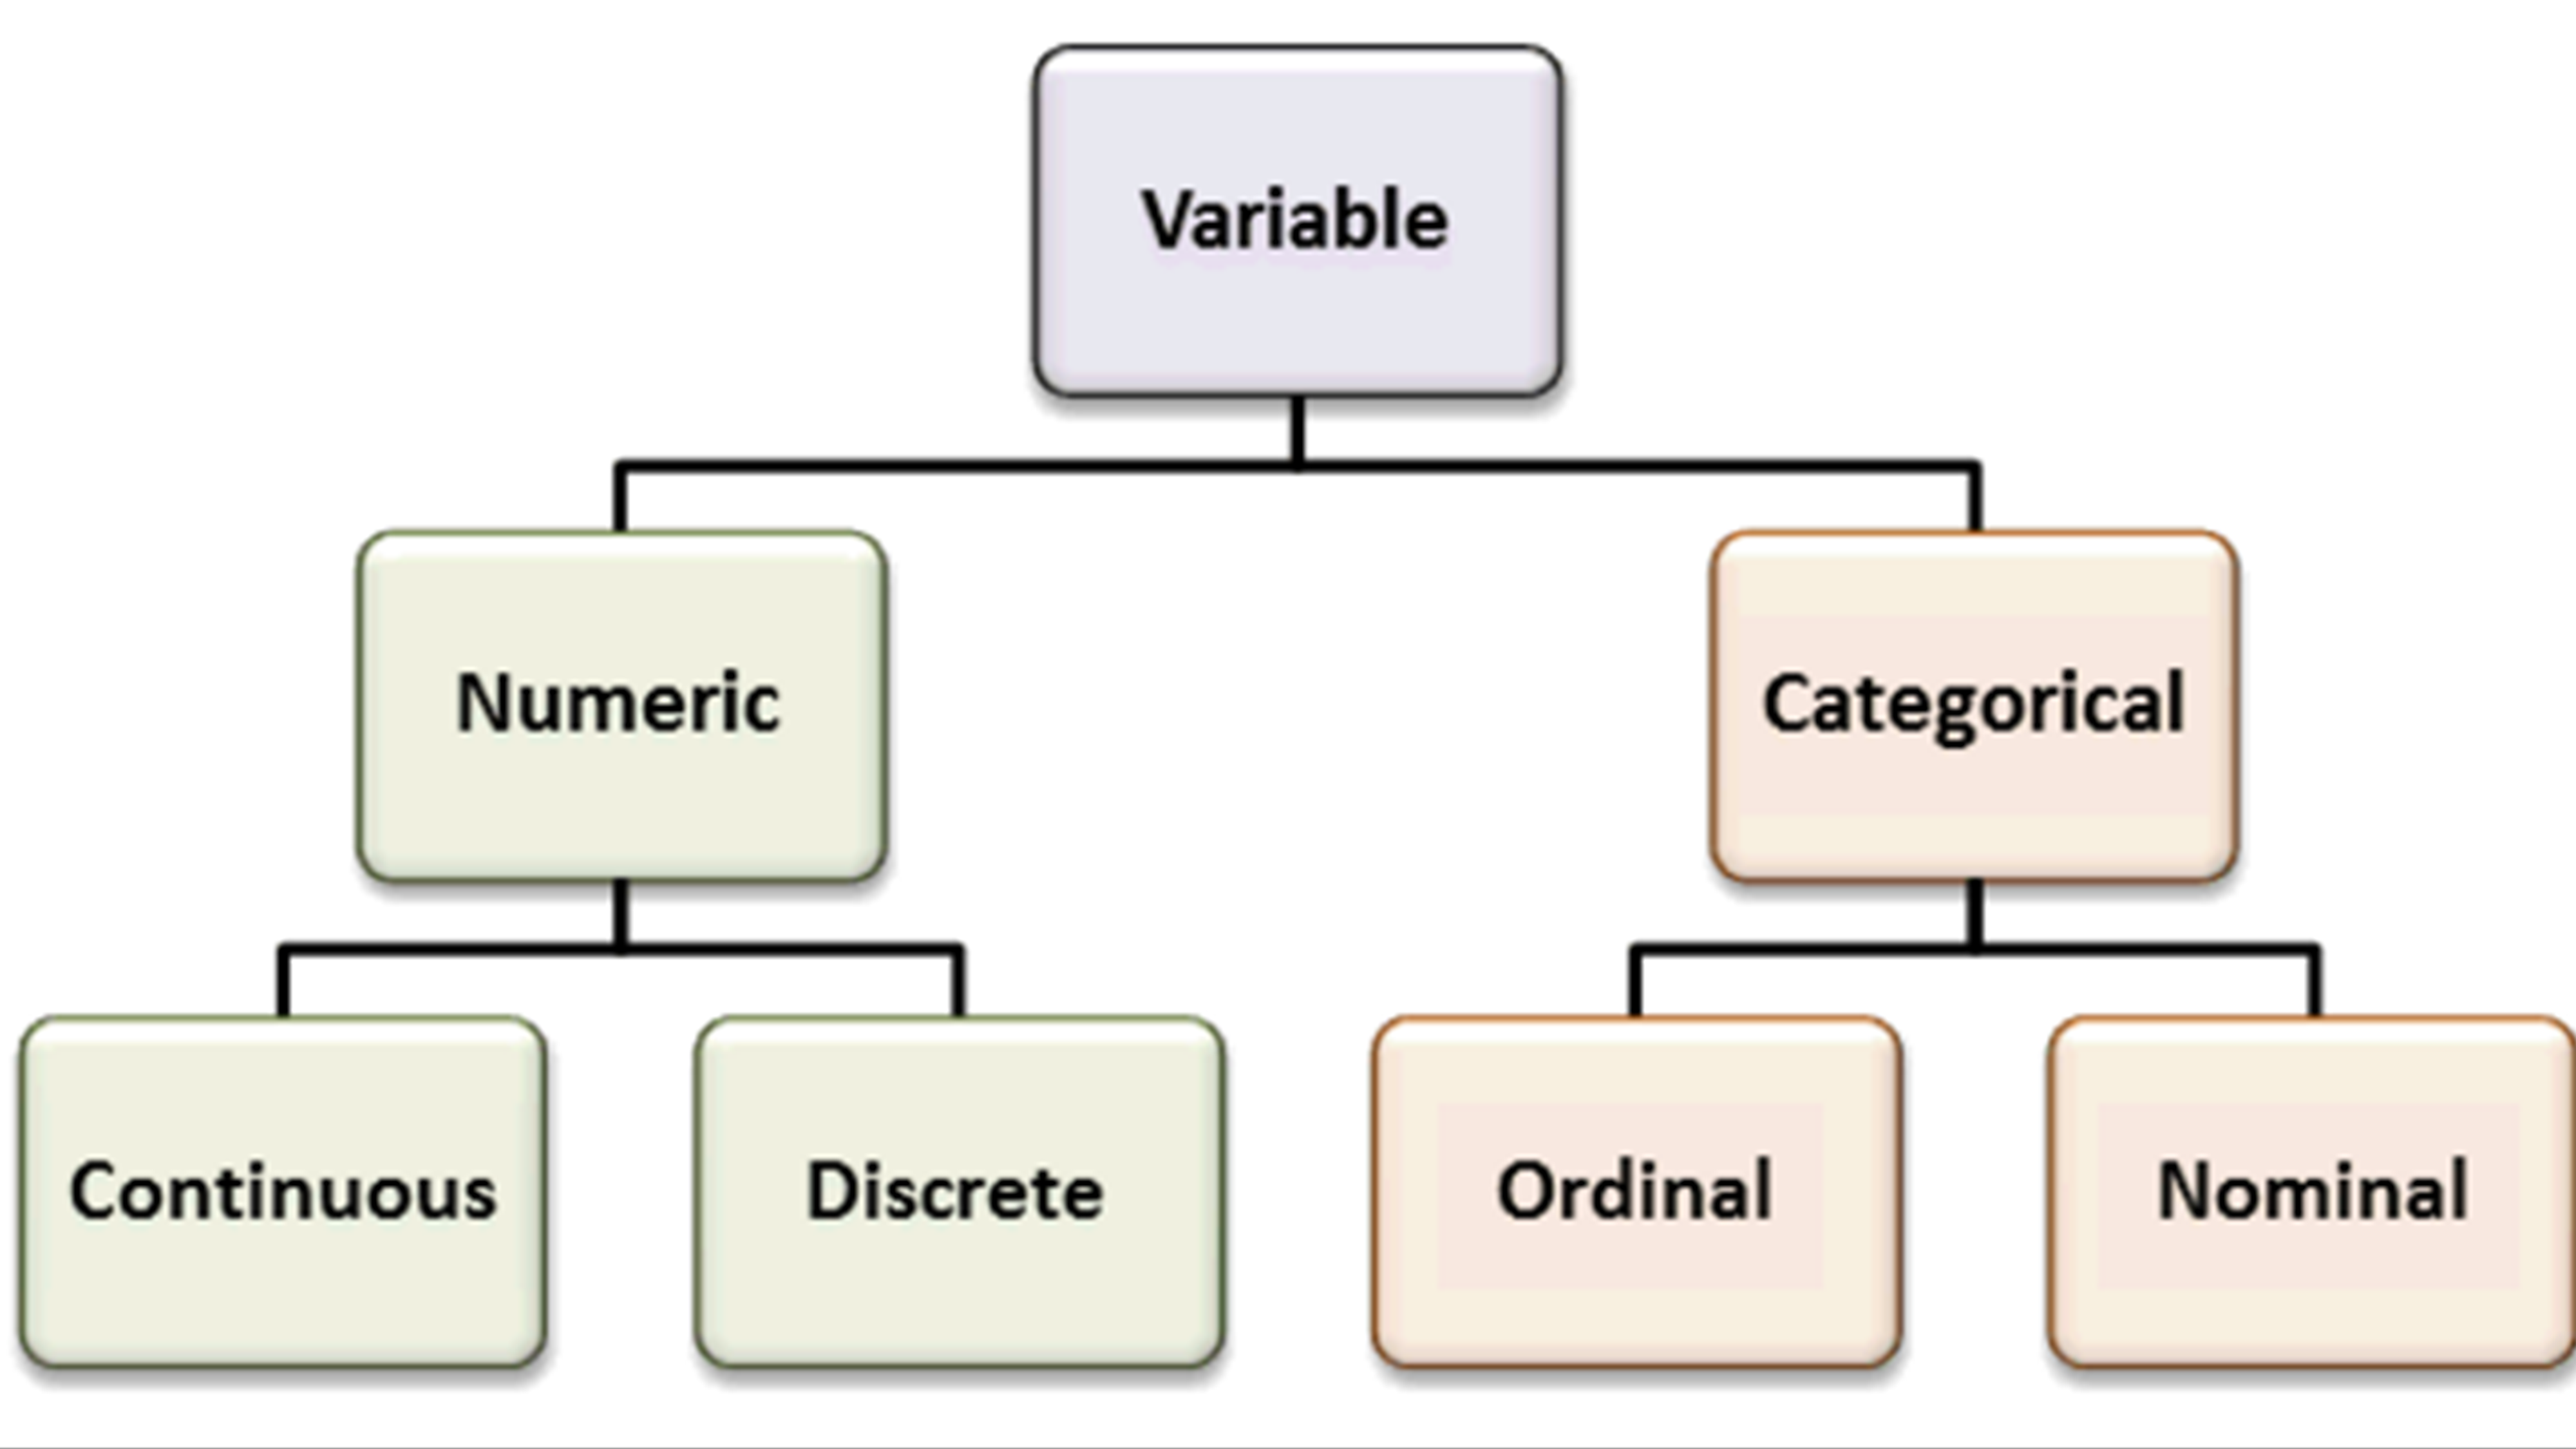

In [10]:
Image("variable_types.png",width=500)

In [12]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']
df = df[numerical_vars+categorical_vars]

In [13]:
df.shape

(1460, 15)

In [14]:
df

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,6,5,1999,953,694,3,RL,Reg,Gilbert,Y,Normal,8,2007
1456,210000,13175,6,6,1978,2073,0,3,RL,Reg,NWAmes,Y,Normal,2,2010
1457,266500,9042,7,9,1941,1188,1152,4,RL,Reg,Crawfor,Y,Normal,5,2010
1458,142125,9717,5,6,1950,1078,0,2,RL,Reg,NAmes,Y,Normal,4,2010


In [15]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

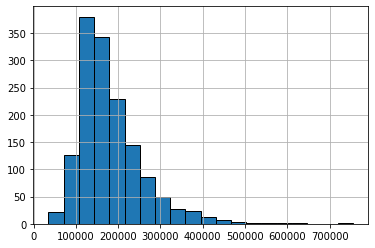

In [34]:
df["SalePrice"].hist(edgecolor='black',bins=20) #univariate analysis

In [33]:
#skewness and kurtosis
print("Skewness: {:0.2f}".format(df['SalePrice'].skew())) #:0.2f is for the decimal point 
print("Kurtosis: {:0.2f}".format(df['SalePrice'].kurt()))

Skewness: 1.88
Kurtosis: 6.54


In [35]:
df[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


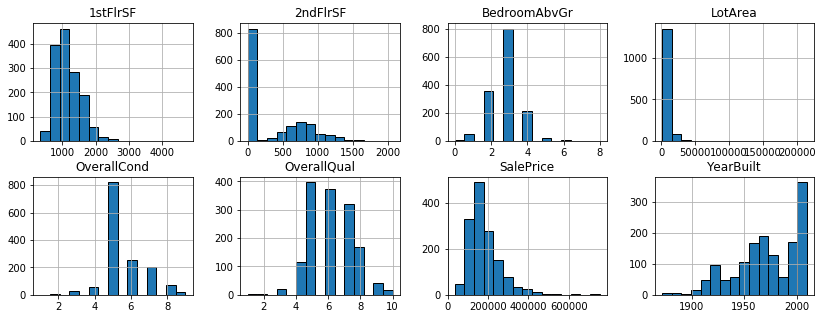

In [48]:
df[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout=(2,4));

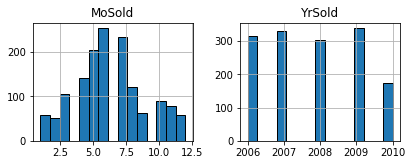

In [49]:
df[categorical_vars].hist(edgecolor='black', bins=15 , figsize=(14,5), layout = (2,4));

In [50]:
 # Variable Creation
df['Age'] = df['YrSold'] - df['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')
df['Age']

/Users/rushabhrumde/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Age, Length: 1460, dtype: int64

In [51]:
df.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold,Age
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008,5
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007,31
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008,7
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006,91
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008,8


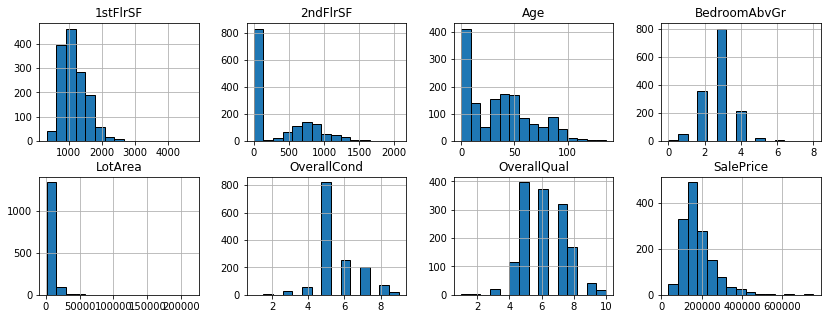

In [52]:
df[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout=(2,4));

# Categorical variables¶


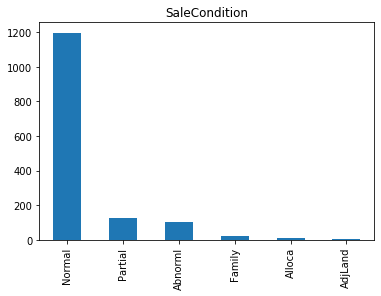

In [54]:
df['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition');

In [58]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

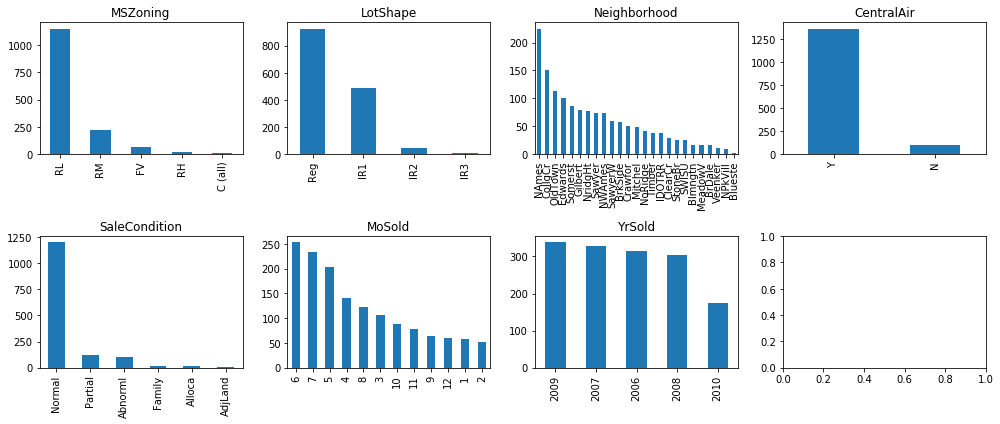

In [56]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    df[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

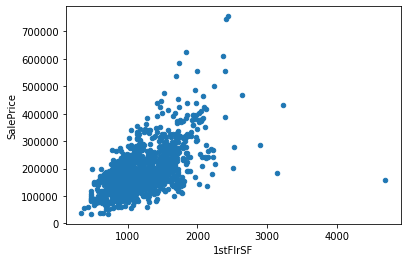

In [59]:
df.plot.scatter(x='1stFlrSF', y='SalePrice');

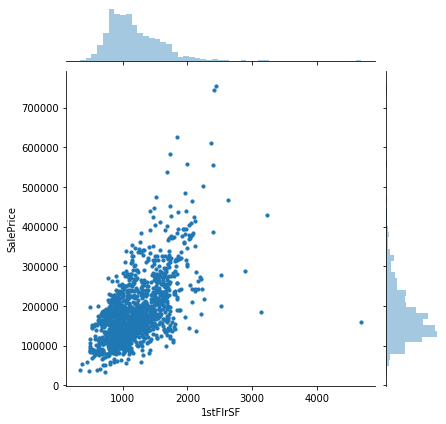

In [60]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=df, joint_kws={"s": 10}); #kws refers to bins

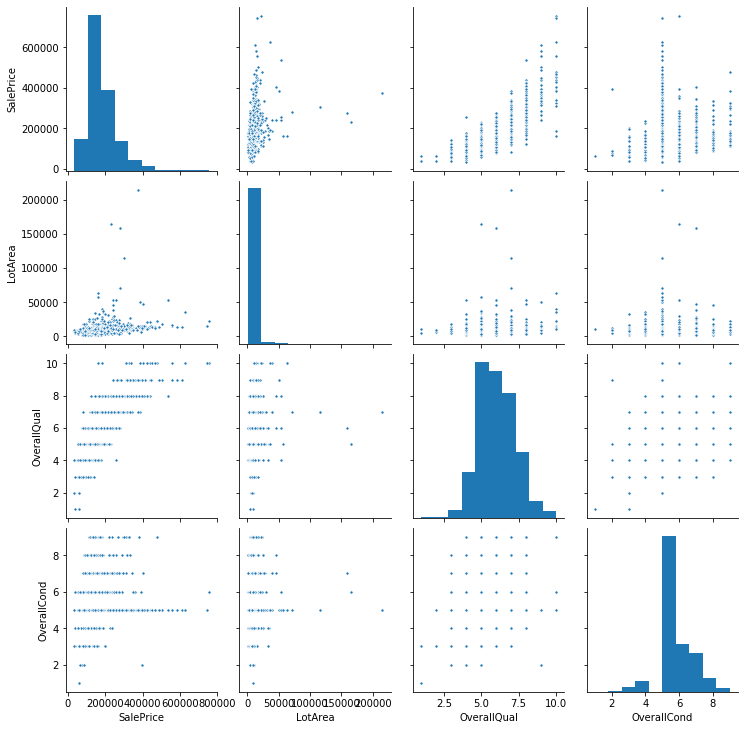

In [61]:
sns.pairplot(df[numerical_vars[:4]], plot_kws={"s": 10}); #S refers to the dimensions of scatter plots

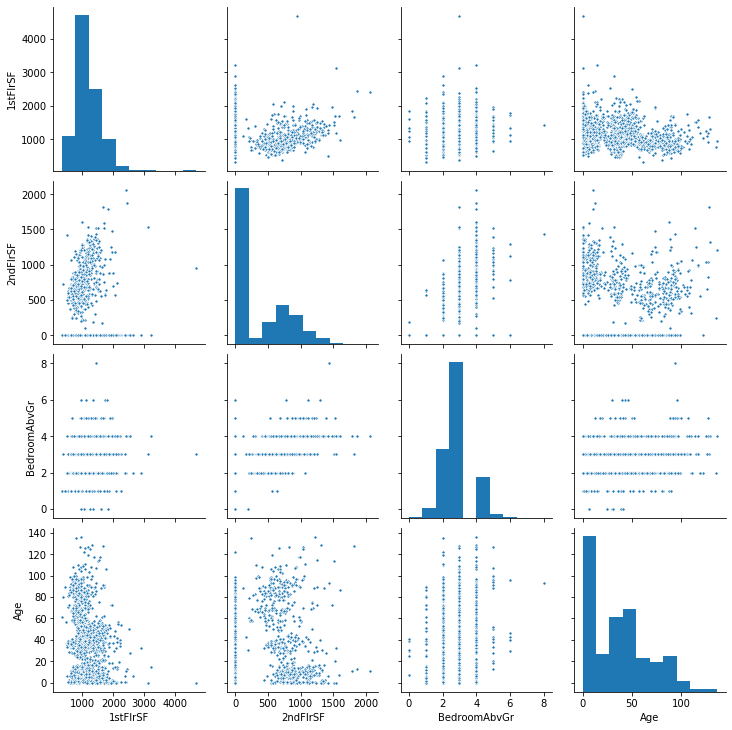

In [62]:
sns.pairplot(df[numerical_vars[4:]], plot_kws={"s": 10});

In [63]:
df[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


In [65]:
df[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
2ndFlrSF        0.319334
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Age            -0.523350
Name: SalePrice, dtype: float64

In [67]:
correlations = df[numerical_vars].corr()
correlations

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


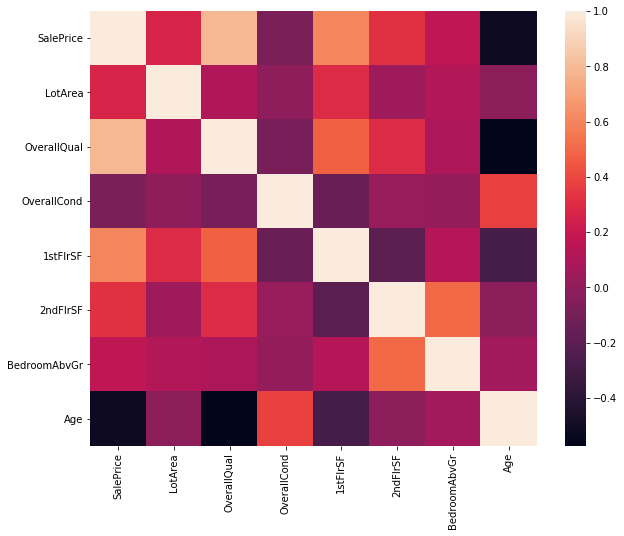

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlations, ax = ax);

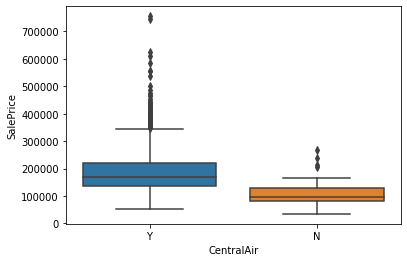

In [72]:
sns.boxplot(x='CentralAir', y='SalePrice', data=df);

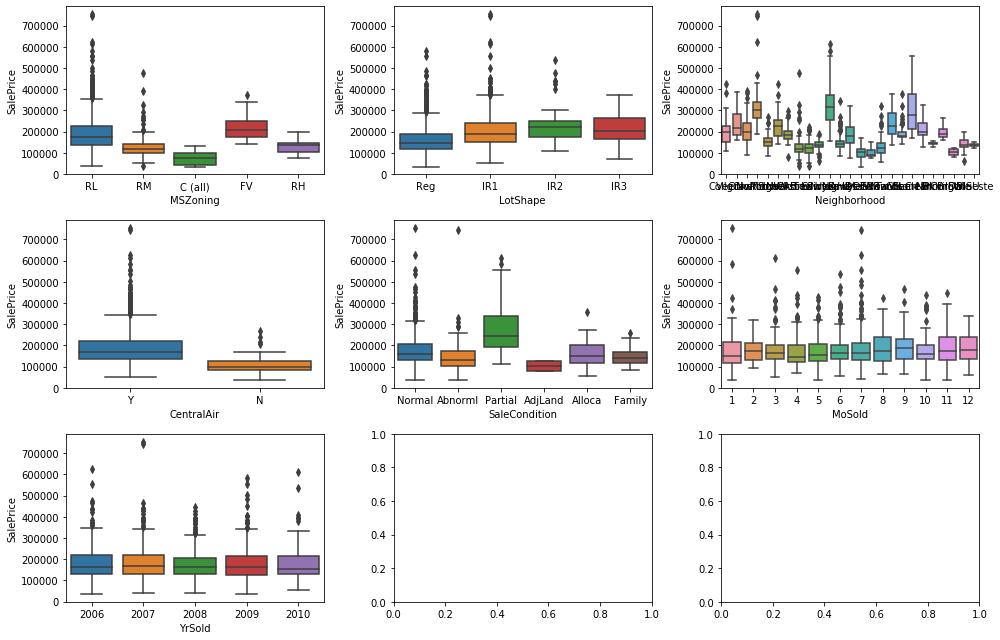

In [73]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

fig.tight_layout()

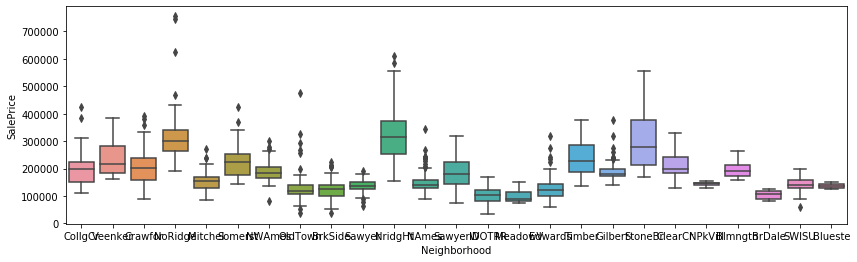

In [74]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=ax);

In [75]:
sorted_nb = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

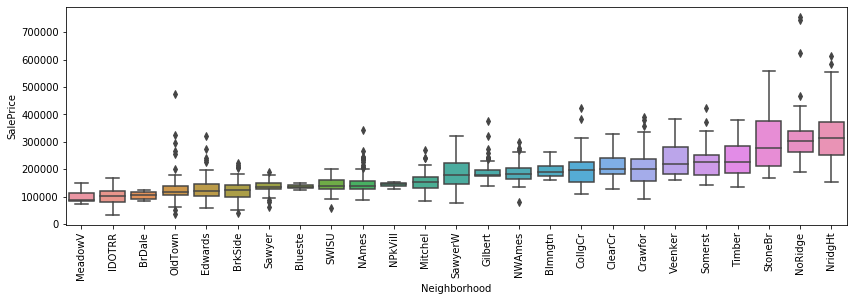

In [76]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');